# PERFORMANCE COMPRESOR DE LA TURBINA A GAS

**Descripción de los datos:** Los datos presentados son datos reales extraidos del historiador de una central termoeléctrica (Exacuantum). El proceso de extracción de datos consistió en identificar las variables de interés para el cálculo de la eficiencia del compresor de la turbina. El historiador tiene capacidad de tener registro de los datos desde 2018 y estos datos son almacenados segundo a segundo, por lo que para facilidad del modelo, se seleccionará fechas específicas sin embargo se puede trabajar con intervalos de tiempos más grandes para robustecer los modelos realizados.

In [127]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [128]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np

## 01. Carga, descripción y limpieza de datos


### Descripción de los Datos



DATE	:	Instante de registro de datos

G1_DWATT:	Potencia de la Turbina a Gas (TG11)

G2_DWATT:	Potencia de la Turbina a Gas (TG12)

S1_DWATT:	Potencia de la  Turbina a Vapor (TV10)

G1_CTIM	:	Temperatura Ingreso al Compresor TG11

G2_CTIM	:	Temperatura Ingreso al Compresor TG12

G1_CPR	:	Ratio de Compresión del TG11

G2_CPR	:	Ratio de Compresión del TG12

G1_CTD	:	Temperatura de Descarga del Compresor TG11

G2_CTD	:	Temperatura de Descarga del Compresor TG12

G1_CPD	:	Presiónde Descarga del Compresor TG11

G2_CPD	:	Presiónde Descarga del Compresor TG12

G1_AT1	:	Temperatura de Ingreso a la Casa de Filtros TG11 - Sensor 01

G1_AT2	:	Temperatura de Ingreso a la Casa de Filtros TG11 - Sensor 02

G1_AT3	:	Temperatura de Ingreso a la Casa de Filtros TG11 - Sensor 03

G2_AT1	:	Temperatura de Ingreso a la Casa de Filtros TG12 - Sensor 01

G2_AT2	:	Temperatura de Ingreso a la Casa de Filtros TG12 - Sensor 02

G2_AT3	:	Temperatura de Ingreso a la Casa de Filtros TG12 - Sensor 03

G1_FQG	:	Flujo de combustible para combustión TG11

G2_FQG	:	Flujo de combustible para combustión TG12

G1_CSBHX:	Apertura de las IBH TG11

G2_CSBHX:	Apertura de las IBH TG12

PR_SR	:	Set Point RPF

STSURS_SR:	STATUS

BP_SR	:	Punto Base

STSAGC_SR:	ESTADO AGC

LLRA_SR	:	LIMITE INFERIOR

HLRA_SR	:	LIMITE SUPERIOR

LR_SR	:	SET LOCAL/REMOTO RSF

FR_SR	:	ESTADO DE SEGUIMIENTO RSF

STATUS_RSF:	STATUS_RSF

11EIC3920:	Set Potencia TG11

12EIC3920:	Set Potencia TG12






### Carga de Datos

In [129]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/03. Machine Learning - Coding Dojo/00. Actividades Plataforma/01. PROYECTO 02/Eficiencia_Compresor_Julio_a_Diciembre_2023.xlsx',
                   skiprows=2)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15457 entries, 0 to 15456
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DATE        15457 non-null  datetime64[ns]
 1   G1_DWATT    15457 non-null  float64       
 2   G2_DWATT    15457 non-null  float64       
 3   S1_DWATT    15457 non-null  float64       
 4   G1_CTIM     15457 non-null  float64       
 5   G2_CTIM     15457 non-null  float64       
 6   G1_CPR      15457 non-null  float64       
 7   G2_CPR      15457 non-null  float64       
 8   G1_CTD      15457 non-null  float64       
 9   G2_CTD      15457 non-null  float64       
 10  G1_CPD      15457 non-null  float64       
 11  G2_CPD      15457 non-null  float64       
 12  G1_AT1      15457 non-null  float64       
 13  G1_AT2      15457 non-null  float64       
 14  G1_AT3      15457 non-null  float64       
 15  G2_AT1      15457 non-null  float64       
 16  G2_AT2      15457 non-

DATE    G1_DWATT    G2_DWATT    S1_DWATT    G1_CTIM  \
0 2023-07-07 00:00:00  182.464020  182.815323  185.923462  50.658714   
1 2023-07-07 00:15:00  178.848755  178.347397  184.303558  50.256260   
2 2023-07-07 00:30:00  185.135635  184.782959  186.302948  50.537636   
3 2023-07-07 00:45:00  183.619492  184.081924  186.112854  50.449390   
4 2023-07-07 01:00:00  185.168991  184.731506  184.871857  50.201321   

     G2_CTIM     G1_CPR     G2_CPR      G1_CTD      G2_CTD  ...  STSURS_SR  \
0  50.662487  16.292986  15.948944  721.421936  709.082214  ...          0   
1  50.407425  15.921415  15.638843  710.943787  701.566467  ...          0   
2  50.722748  16.467556  16.128410  724.413208  712.161804  ...          0   
3  50.741253  16.328714  16.006746  720.817444  709.464478  ...          0   
4  50.684986  16.455938  16.089300  723.259033  711.226379  ...          0   

        BP_SR  STSAGC_SR     LLRA_SR     HLRA_SR  LR_SR     FR_SR  STATUS_RSF  \
0  535.656738          1  540.774353  540.089722      0  1.159668           0   
1  535.656677          1  540.765564  540.109680      0  1.159668           0   
2  535.656677          1  540.748047  540.101501      0  1.159665           0   
3  535.647278          1  540.747070  540.090515      0  1.159668           0   
4  535.649536          1  540.746582  540.106262      0  1.159763           0   

    11EIC3920   12EIC3920  
0  182.629898  182.632828  
1  178.586090  178.150406  
2  185.032745  184.888687  
3  183.977829  184.566422  
4  185.032745  184.859390  

[5 rows x 33 columns]

In [130]:
df.tail()

DATE    G1_DWATT    G2_DWATT    S1_DWATT    G1_CTIM  \
15452 2023-12-14 23:00:00  181.781219  182.363754  186.509857  50.987663   
15453 2023-12-14 23:15:00  183.245224  183.701843  185.961853  50.659935   
15454 2023-12-14 23:30:00  182.371017  182.346649  185.582306  50.676727   
15455 2023-12-14 23:45:00  185.175491  184.555573  185.940567  50.417400   
15456 2023-12-15 00:00:00  182.996536  182.695419  185.964035  50.438274   

         G2_CTIM     G1_CPR     G2_CPR      G1_CTD      G2_CTD  ...  \
15452  50.907078  16.297184  16.006283  721.868164  709.253052  ...   
15453  50.810791  16.369154  16.044579  721.465393  709.982178  ...   
15454  50.615261  16.361931  16.007462  722.937317  710.879944  ...   
15455  50.781822  16.485283  16.169298  724.843506  712.816101  ...   
15456  51.083359  16.412012  16.027103  723.287964  711.557251  ...   

       STSURS_SR       BP_SR  STSAGC_SR     LLRA_SR     HLRA_SR  LR_SR  \
15452          0  529.632568          1  560.668945  560.049866      0   
15453          0  529.616577          1  532.142395  531.644470      0   
15454          0  529.641846          1  532.142700  531.655762      0   
15455          0  529.613098          1  550.727661  550.277832      0   
15456          0  529.614258          1  550.717163  550.290161      0   

          FR_SR  STATUS_RSF   11EIC3920   12EIC3920  
15452  1.164245           0  182.073135  182.515640  
15453  1.161693           0  183.421082  183.541031  
15454  1.165717           0  182.424774  182.515640  
15455  1.165673           0  185.120651  185.064468  
15456  1.164998           0  183.069443  182.955093  

[5 rows x 33 columns]

In [131]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [132]:
df.duplicated().sum()

0

In [133]:
df_original = df

# Cálculo de la eficiencia del compresor


Determinaremos la eficiencia del compresor mediante el siguiente cálculo:

Temperatura de Descarga Ideal(T_i) = CTIM*CPR^(1-1/1.4)

Eficiencia del Compresor = (T_i-CTIM)/(CTD-CTIM)


Consideramos que las variables de CTIM y CTD están en grafos Farenheit y necesitamos llevar todo a grados Kelvin.

( X°F − 32) × 5/9 + 273.15

quedando la formula de la siguiente manera

* CTIM_TG11 =  (G1_CTIM-32)*(5/9)+273.15
* CTD_TG11 =   (G1_CTD-32)*(5/9)+273.15
* Temperatura Descarga ideal (T_ideal) = ((G1_CTIM-32)*(5/9)+273)*(G1_CPR**(1-1.4))
* Eficiencia del Compresor = (T_ideal - CTIM)/(CTD - CTIM)
* Eficiencia del Compresor = ((((G1_CTIM-32)*(5/9)+273)*(G1_CPR**(1-1.4)))-((G1_CTIM-32)*(5/9)+273))/(((G1_CTD-32)*(5/9)+273)-((G1_CTIM-32)*(5/9)+273))
G1_CPR



In [134]:
# @title Conversión de Temperaturas
df['G1_CTIM_K'] = (df['G1_CTIM']-32)*(5/9)+273.15
df['G2_CTIM_K'] = (df['G2_CTIM']-32)*(5/9)+273.15
df['G1_CTD_K'] = (df['G1_CTD']-32)*(5/9)+273.15
df['G2_CTD_K'] = (df['G2_CTD']-32)*(5/9)+273.15

In [135]:
# @title Cálculo de la temperatura Ideal
df['G1_T_ideal'] = df['G1_CTIM_K']*(df['G1_CPR']**(1-(1/1.4)))
df['G2_T_ideal'] = df['G2_CTIM_K']*(df['G2_CPR']**(1-(1/1.4)))

In [136]:
# @title Cálculo de la Eficiencia del Compresor
df['G1_efic_comp'] = (df['G1_T_ideal'] - df['G1_CTIM_K'])/(df['G1_CTD_K']-df['G1_CTIM_K'])
df['G2_efic_comp'] = (df['G2_T_ideal'] - df['G2_CTIM_K'])/(df['G2_CTD_K']-df['G2_CTIM_K'])

In [137]:
fig = px.line(df, x='DATE', y=['G1_efic_comp', 'G2_efic_comp',], title='Eficiencia del compresor de las turbinas del 07-Jul-2023 al 25-Sep-2023',
              labels={'value': 'Eficiencia'})
fig.show()

In [138]:
df[['G1_efic_comp', 'G2_efic_comp']].describe().T

count  mean  std  min       25%       50%       75%  \
G1_efic_comp  15457.0  -inf  NaN -inf  0.927161  0.928534  0.929727   
G2_efic_comp  15457.0  -inf  NaN -inf  0.930694  0.933249  0.935327   

                     max  
G1_efic_comp  100.786322  
G2_efic_comp   93.298047

In [139]:
filter_efi_TG11 = (df['G1_efic_comp'] < 1) & (df['G1_efic_comp'] > 0)
filter_efi_TG12 = (df['G2_efic_comp'] < 1) & (df['G2_efic_comp'] > 0)

In [140]:
df = df.loc[filter_efi_TG11, :]
df = df.loc[filter_efi_TG12, :]

In [141]:
fig = px.line(df, x='DATE', y=['G1_efic_comp', 'G2_efic_comp',], title='Eficiencia del compresor de las turbinas del 07-Jul-2023 al 15-Dic-2023',
              labels={'value': 'Eficiencia'})
fig.show()

In [142]:
df[['G1_efic_comp', 'G2_efic_comp']].describe().T

count      mean       std       min       25%       50%  \
G1_efic_comp  14553.0  0.906082  0.118525  0.018912  0.927252  0.928514   
G2_efic_comp  14553.0  0.884645  0.188908  0.000017  0.931094  0.933420   

                   75%       max  
G1_efic_comp  0.929626  0.997788  
G2_efic_comp  0.935379  0.988465

In [143]:
# @title División de Datos para la Turbina a Gas - TG11
df_TG11 = df[['G1_DWATT','G1_CTIM','G1_CTD','G1_CPD','G1_AT1','G1_AT2','G1_AT3','G1_FQG','G1_CSBHX','G1_efic_comp']]

#TURBINA A GAS - TG11

In [144]:
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [145]:
df_TG11

G1_DWATT    G1_CTIM      G1_CTD      G1_CPD     G1_AT1     G1_AT2  \
0      182.464020  50.658714  721.421936  220.940674  67.716599  68.681351   
1      178.848755  50.256260  710.943787  215.409454  67.705605  68.479942   
2      185.135635  50.537636  724.413208  223.500046  67.596191  68.448303   
3      183.619492  50.449390  720.817444  222.083740  67.123573  68.080338   
4      185.168991  50.201321  723.259033  224.025757  67.129135  67.698898   
...           ...        ...         ...         ...        ...        ...   
15452  181.781219  50.987663  721.868164  220.295425  68.384148  69.217033   
15453  183.245224  50.659935  721.465393  221.930252  68.528122  69.165726   
15454  182.371017  50.676727  722.937317  221.309906  68.193604  68.908913   
15455  185.175491  50.417400  724.843506  223.040634  67.363045  67.912758   
15456  182.996536  50.438274  723.287964  222.244766  67.229507  67.944962   

          G1_AT3     G1_FQG  G1_CSBHX  G1_efic_comp  
0      68.666046  22.123453  0.001568      0.927937  
1      68.566742  21.759668  0.021875      0.930091  
2      68.380699  22.478994  0.005296      0.928557  
3      68.045120  22.217957  0.009575      0.929161  
4      68.212982  22.487167  0.005445      0.928733  
...          ...        ...       ...           ...  
15452  69.079582  22.073576  0.137290      0.928497  
15453  69.001228  22.237961  0.126767      0.930133  
15454  68.848877  22.116358  0.138998      0.927937  
15455  68.227158  22.448347  0.133127      0.928098  
15456  68.275871  22.170477  0.133181      0.928163  

[14553 rows x 10 columns]

In [146]:
num_selector = make_column_selector(dtype_include='number')

In [147]:
standard_scaler = StandardScaler()

In [148]:
imputer_num = SimpleImputer(strategy="mean")

In [149]:
col_transformer = make_column_transformer((make_pipeline(imputer_num,standard_scaler), num_selector),
                        remainder = 'passthrough')

col_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ac449cf45e0>)])

In [150]:
X_TG11 = df_TG11.drop(['G1_efic_comp'], axis=1)
y_TG11 = df_TG11['G1_efic_comp']

In [151]:
col_transformer.fit(X_TG11)
X_processed_TG11 = col_transformer.transform(X_TG11)

In [152]:
X_processed_TG11 = pd.DataFrame(X_processed_TG11, columns=col_transformer.get_feature_names_out())

In [153]:
X_processed_TG11

pipeline__G1_DWATT  pipeline__G1_CTIM  pipeline__G1_CTD  \
0                0.287550          -0.325561          0.230485   
1                0.193340          -0.378214          0.135887   
2                0.357169          -0.341402          0.257491   
3                0.317660          -0.352947          0.225028   
4                0.358038          -0.385402          0.247071   
...                   ...                ...               ...   
14548            0.269757          -0.282525          0.234514   
14549            0.307907          -0.325402          0.230877   
14550            0.285126          -0.323205          0.244166   
14551            0.358207          -0.357132          0.261375   
14552            0.301426          -0.354401          0.247332   

       pipeline__G1_CPD  pipeline__G1_AT1  pipeline__G1_AT2  pipeline__G1_AT3  \
0              0.300353         -0.329097         -0.296334         -0.287603   
1              0.173452         -0.330476         -0.322142         -0.300794   
2              0.359072         -0.344202         -0.326197         -0.325506   
3              0.326578         -0.403495         -0.373348         -0.370081   
4              0.371133         -0.402798         -0.422227         -0.347784   
...                 ...               ...               ...               ...   
14548          0.285549         -0.245348         -0.227691         -0.232673   
14549          0.323057         -0.227286         -0.234265         -0.243081   
14550          0.308824         -0.269253         -0.267174         -0.263318   
14551          0.348532         -0.373452         -0.394822         -0.345901   
14552          0.330273         -0.390205         -0.390696         -0.339430   

       pipeline__G1_FQG  pipeline__G1_CSBHX  
0              0.140183           -0.151021  
1              0.068698           -0.147034  
2              0.210048           -0.150289  
3              0.158753           -0.149449  
4              0.211654           -0.150260  
...                 ...                 ...  
14548          0.130382           -0.124374  
14549          0.162684           -0.126440  
14550          0.138789           -0.124038  
14551          0.204026           -0.125191  
14552          0.149423           -0.125180  

[14553 rows x 9 columns]

In [154]:
wcss = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_processed_TG11)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_processed_TG11, kmeans.labels_))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

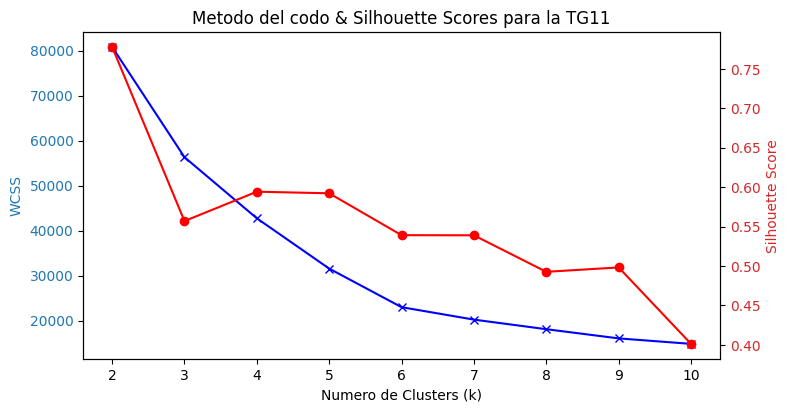

In [155]:
# Plotting the elbow method and silhouette scores
fig, ax1 = plt.subplots(figsize=(8, 4))

ax1.set_xlabel('Numero de Clusters (k)')
ax1.set_ylabel('WCSS', color='tab:blue')
ax1.plot(K, wcss, 'bx-')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Silhouette Score', color='tab:red')
ax2.plot(K, silhouette_scores, 'ro-')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.tight_layout()
plt.title('Metodo del codo & Silhouette Scores para la TG11')
plt.show()

In [156]:
df_summary_TG11 = pd.DataFrame({
    'Number of Clusters (k)': K,
    'WCSS': wcss,
    'Silhouette Score': silhouette_scores
})
df_summary_TG11

Number of Clusters (k)          WCSS  Silhouette Score
0                       2  80831.735424          0.777689
1                       3  56306.248829          0.556952
2                       4  42724.674915          0.594164
3                       5  31540.698105          0.592146
4                       6  22968.499846          0.539089
5                       7  20201.939800          0.538902
6                       8  18071.378182          0.492668
7                       9  16030.045207          0.498218
8                      10  14811.895356          0.401368

*Observamos que tenemos un SS similar para el un cluster 4 o 5. Intentaremos probar con el cluster 04 y ver si existe una correlación*

In [157]:
#@title Cluster 4 para TG11
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters_TG11 = kmeans.fit_predict(X_processed_TG11)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [158]:
df_TG11['Cluster'] = clusters_TG11
df_TG11

<ipython-input-158-f311d0b47fa6>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



G1_DWATT    G1_CTIM      G1_CTD      G1_CPD     G1_AT1     G1_AT2  \
0      182.464020  50.658714  721.421936  220.940674  67.716599  68.681351   
1      178.848755  50.256260  710.943787  215.409454  67.705605  68.479942   
2      185.135635  50.537636  724.413208  223.500046  67.596191  68.448303   
3      183.619492  50.449390  720.817444  222.083740  67.123573  68.080338   
4      185.168991  50.201321  723.259033  224.025757  67.129135  67.698898   
...           ...        ...         ...         ...        ...        ...   
15452  181.781219  50.987663  721.868164  220.295425  68.384148  69.217033   
15453  183.245224  50.659935  721.465393  221.930252  68.528122  69.165726   
15454  182.371017  50.676727  722.937317  221.309906  68.193604  68.908913   
15455  185.175491  50.417400  724.843506  223.040634  67.363045  67.912758   
15456  182.996536  50.438274  723.287964  222.244766  67.229507  67.944962   

          G1_AT3     G1_FQG  G1_CSBHX  G1_efic_comp  Cluster  
0      68.666046  22.123453  0.001568      0.927937        2  
1      68.566742  21.759668  0.021875      0.930091        2  
2      68.380699  22.478994  0.005296      0.928557        2  
3      68.045120  22.217957  0.009575      0.929161        2  
4      68.212982  22.487167  0.005445      0.928733        2  
...          ...        ...       ...           ...      ...  
15452  69.079582  22.073576  0.137290      0.928497        2  
15453  69.001228  22.237961  0.126767      0.930133        2  
15454  68.848877  22.116358  0.138998      0.927937        2  
15455  68.227158  22.448347  0.133127      0.928098        2  
15456  68.275871  22.170477  0.133181      0.928163        2  

[14553 rows x 11 columns]

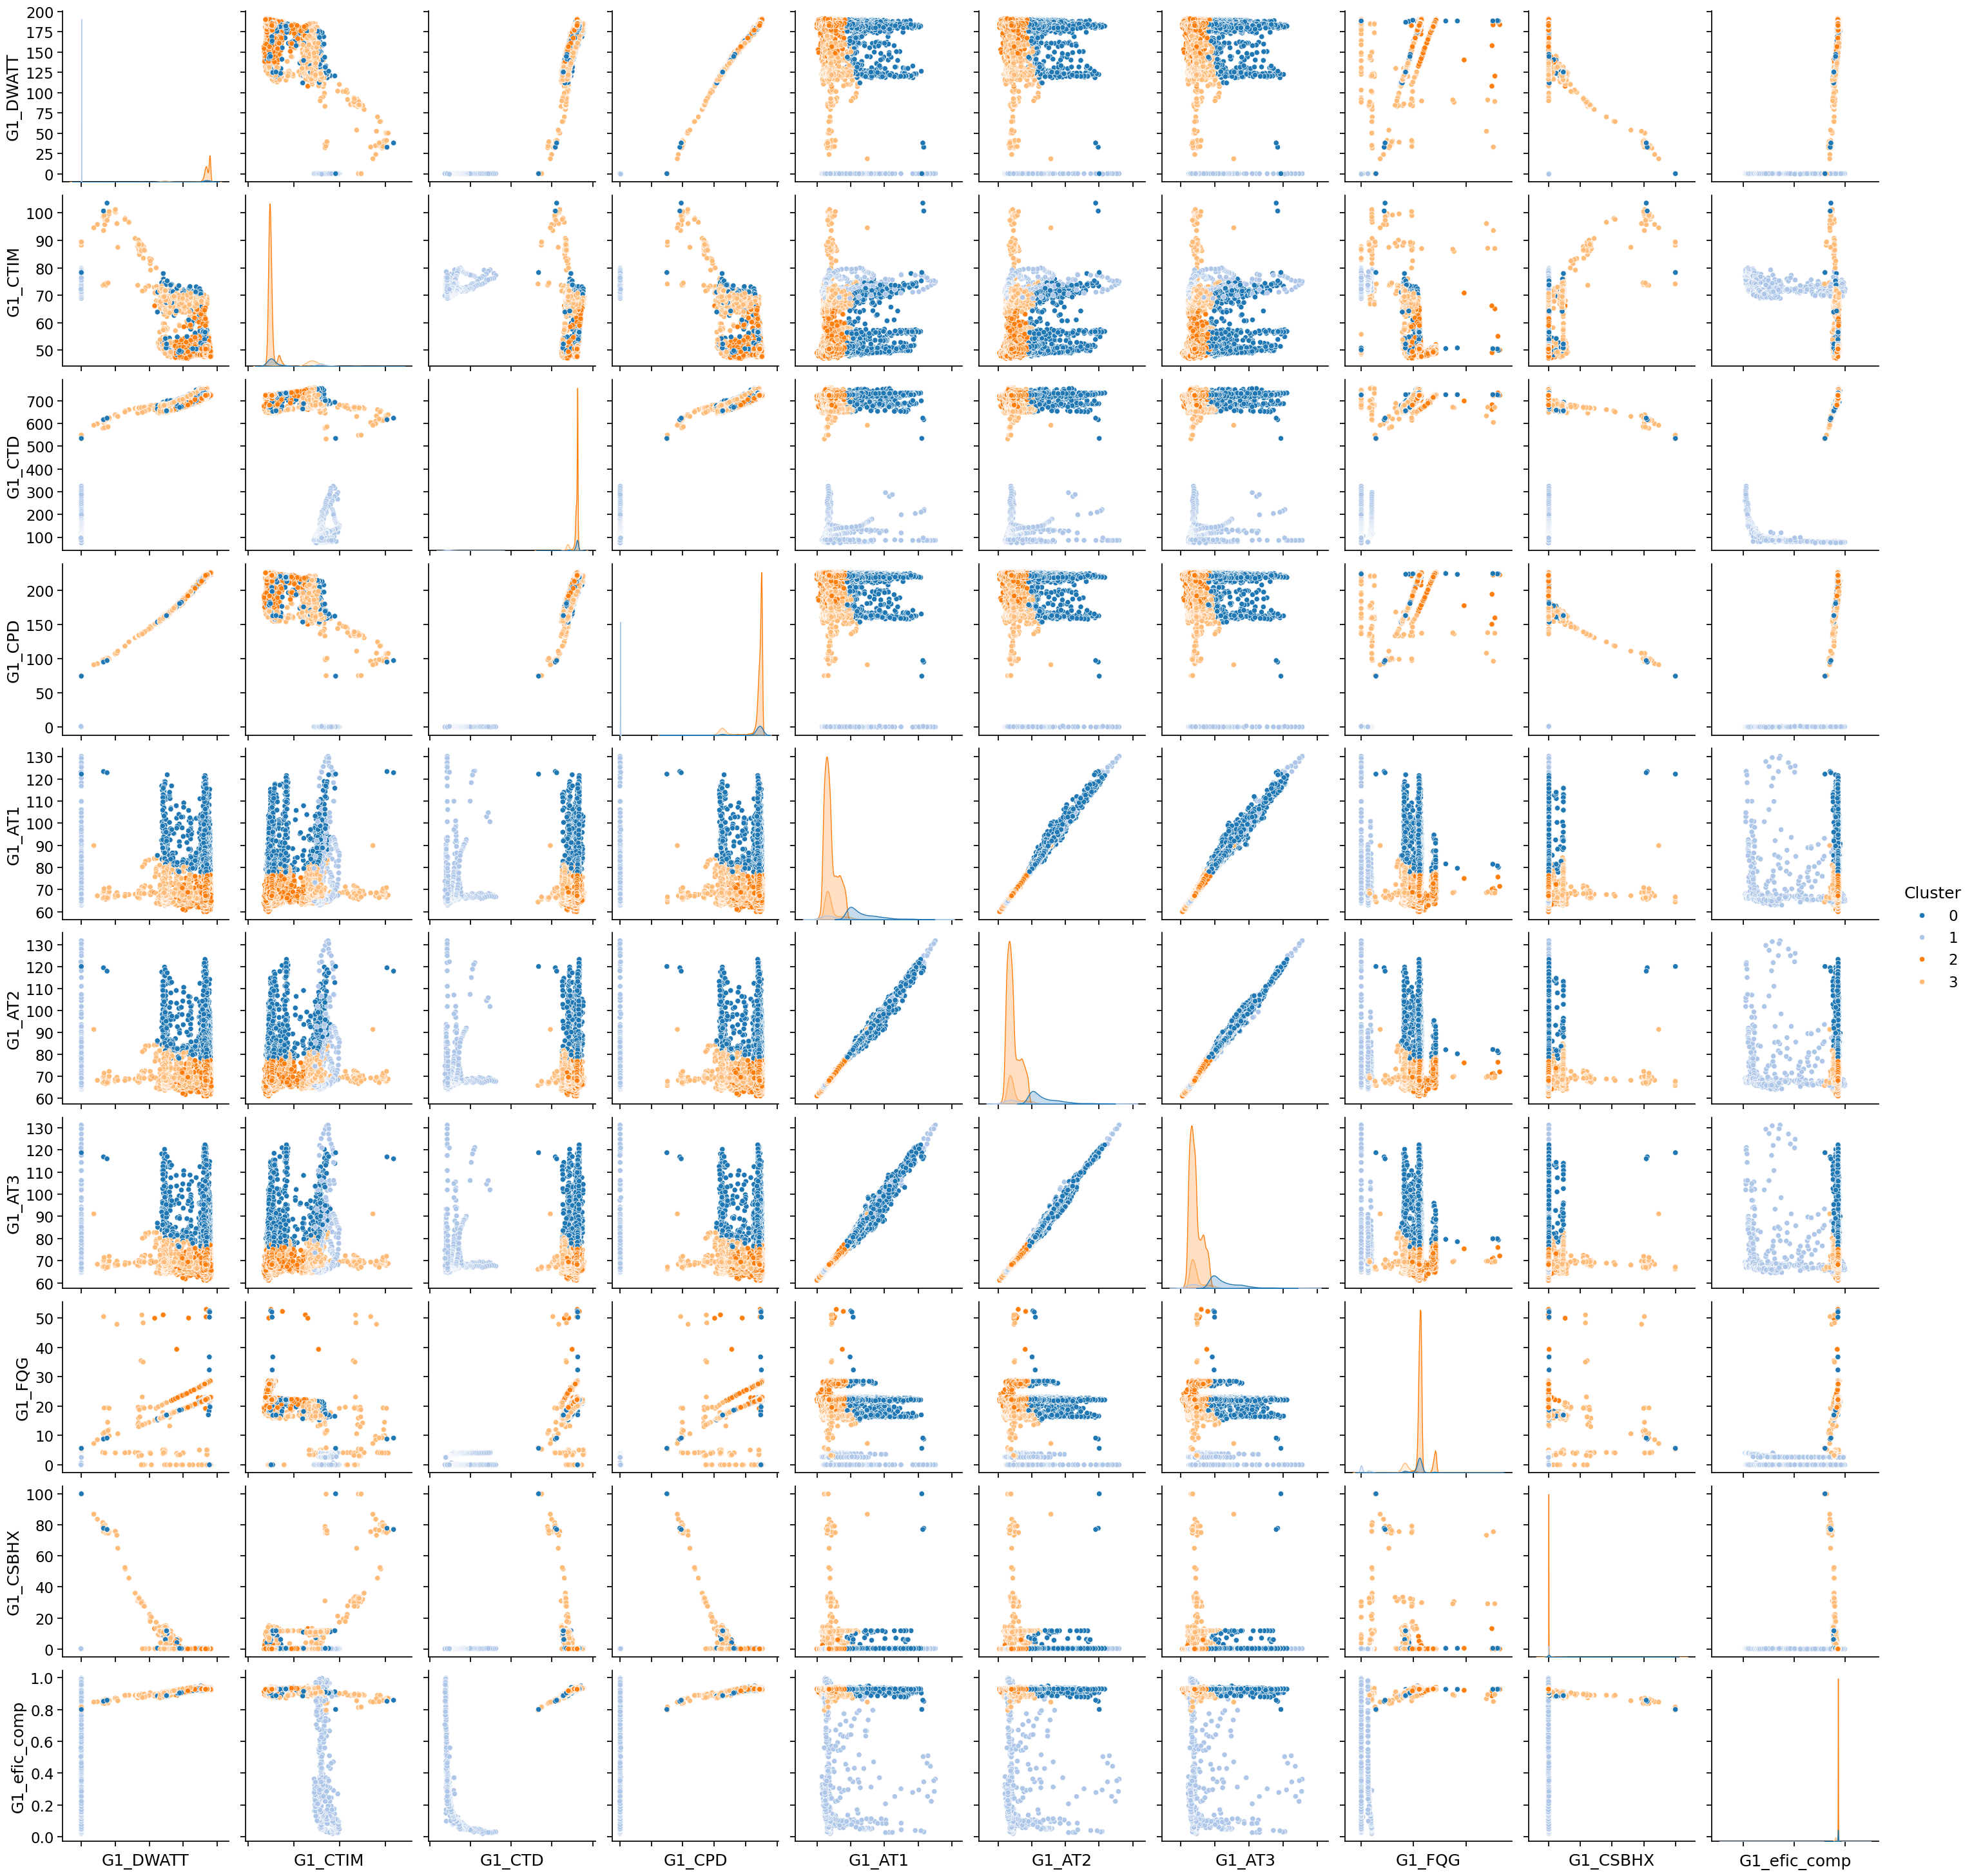

In [159]:
with sns.plotting_context("notebook", font_scale=1.5):
    g = sns.pairplot(df_TG11,
                     hue='Cluster', palette='tab20', height=3)
    g.set(xticklabels=[])

plt.show()

Si bien identificamos que la eficiencia del compresor de la TG12 es mayor al compresor de la TG11, trataremos a agrupar en grupo de 5 intervalos para abarcar los datos.

Eficiencia Compresor TG11:
- Eficiencia A: Alta Eficiencia [0.94 a 1.00]
- Eficiencia B: Carga Base [0.925 a 0.94]
- Eficiencia C: Minimo Tec [0.88 a 0.925]
- Eficiencia D: Baja Eficiencia [0a 0.88]





In [160]:
labels = [0,          #'Eficiencia D: Fuera de Servicio & baja eficiencia'
          1,          #'Eficiencia C: Baja Eficiencia'
          2,          #'Eficiencia B: Minimo Tec'
          3]          #'Eficiencia A: Carga Base'

In [161]:
#@title Definir Rango de Eficiencia TG11
bins_TG11 = [0, 0.887, 0.92, 0.932, 1.00]
df_TG11['Eficiencia_Clasificacion'] = pd.cut(df_TG11['G1_efic_comp'], bins=bins_TG11, labels=labels, right=False)

<ipython-input-161-cd810a51492a>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [162]:
df_visual_TG11 = df_TG11[['G1_DWATT','G1_AT1','G1_CSBHX','Cluster','Eficiencia_Clasificacion']]
df_visual_TG11

G1_DWATT     G1_AT1  G1_CSBHX  Cluster Eficiencia_Clasificacion
0      182.464020  67.716599  0.001568        2                        2
1      178.848755  67.705605  0.021875        2                        2
2      185.135635  67.596191  0.005296        2                        2
3      183.619492  67.123573  0.009575        2                        2
4      185.168991  67.129135  0.005445        2                        2
...           ...        ...       ...      ...                      ...
15452  181.781219  68.384148  0.137290        2                        2
15453  183.245224  68.528122  0.126767        2                        2
15454  182.371017  68.193604  0.138998        2                        2
15455  185.175491  67.363045  0.133127        2                        2
15456  182.996536  67.229507  0.133181        2                        2

[14553 rows x 5 columns]

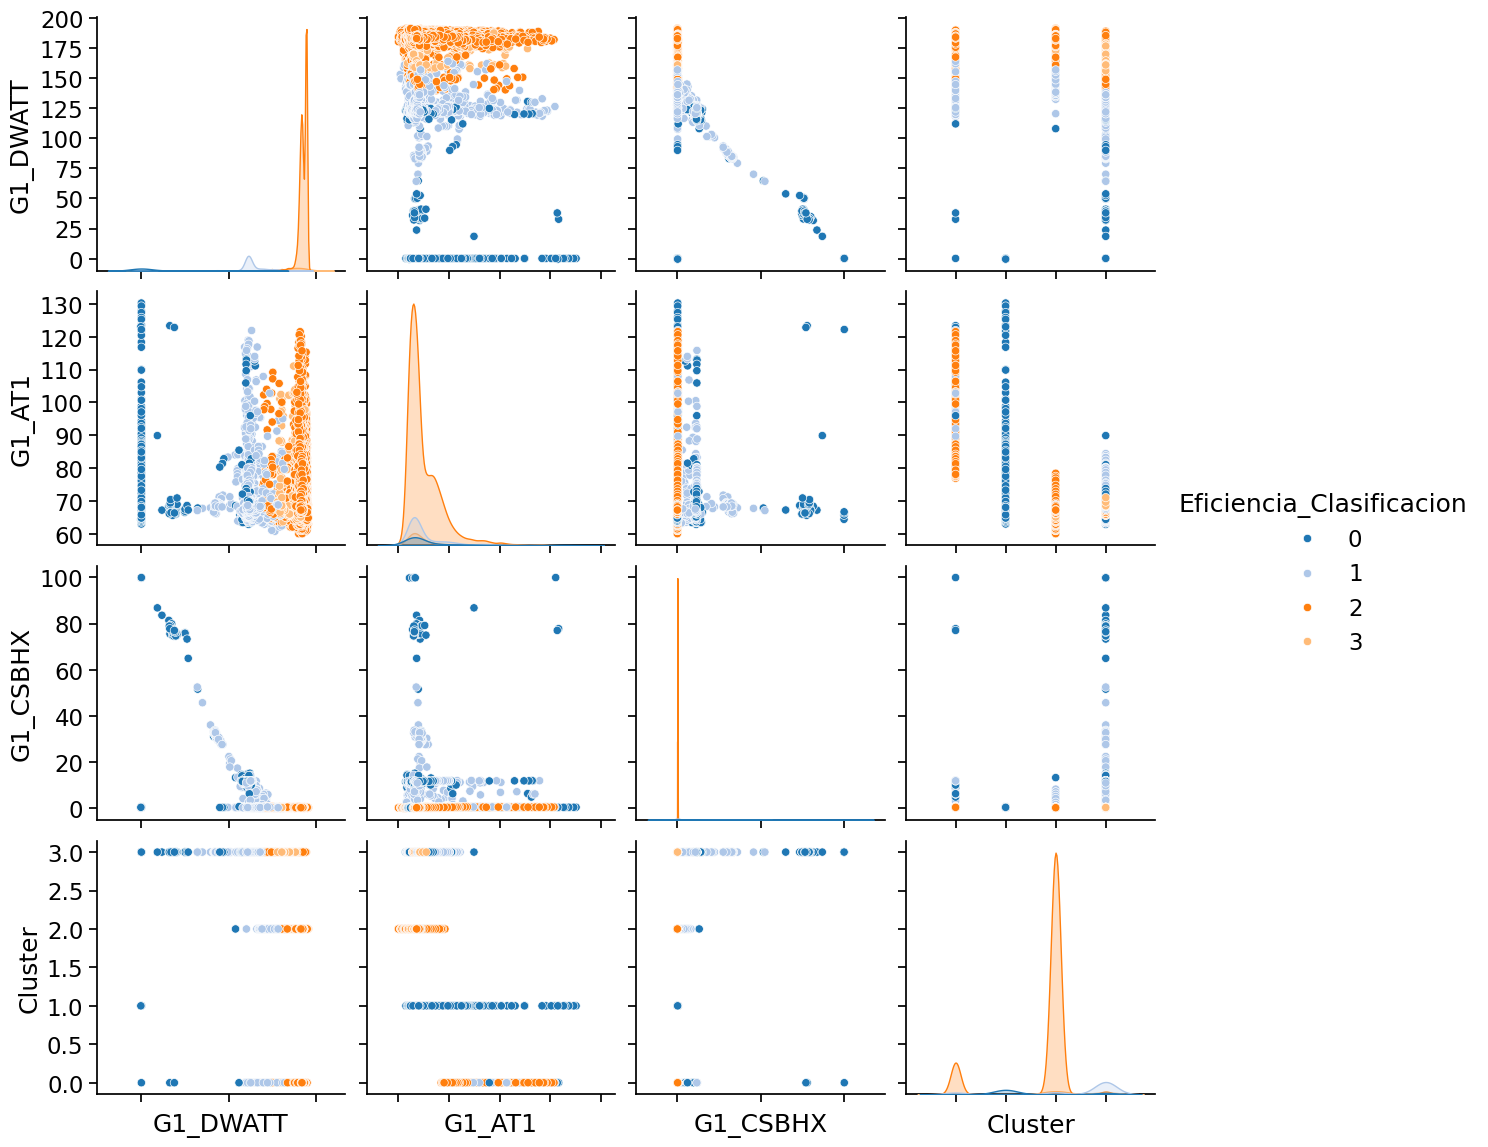

In [163]:
with sns.plotting_context("notebook", font_scale=1.5):
    g = sns.pairplot(df_visual_TG11,
                     hue='Eficiencia_Clasificacion', palette='tab20', height=3)
    g.set(xticklabels=[])

plt.show()

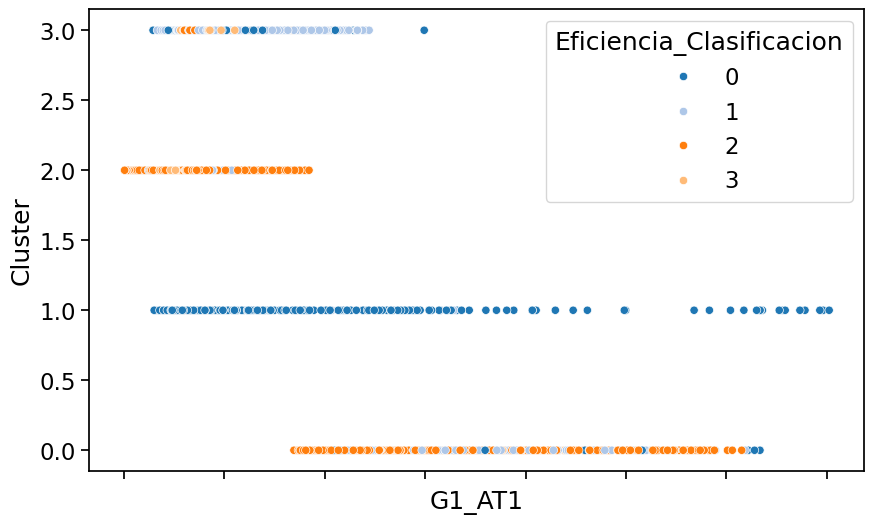

In [164]:
with sns.plotting_context("notebook", font_scale=1.5):
    plt.figure(figsize=(10, 6))
    g = sns.scatterplot(data=df_visual_TG11, x='G1_AT1', y='Cluster', hue='Eficiencia_Clasificacion', palette='tab20')
    g.set(xticklabels=[])

plt.show()

#TURBINA A GAS - TG12

In [165]:
# @title División de Datos para la Turbina a Gas - TG12
df_TG12 = df[['G2_DWATT','G2_CTIM','G2_CTD','G2_CPD','G2_AT1','G2_AT2','G2_AT3','G2_FQG','G2_CSBHX','G2_efic_comp']]

In [166]:
df_TG12 ['G2_AT_prom'] = (df_TG12['G2_AT1'] + df_TG12['G2_AT2'] + df_TG12['G2_AT3'])/3
df_TG12 = df_TG12.drop(['G2_AT1','G2_AT2','G2_AT3'], axis=1, inplace=False)
df_TG12 = df_TG12[['G2_DWATT','G2_CTIM','G2_CTD','G2_CPD','G2_AT_prom','G2_FQG','G2_CSBHX','G2_efic_comp']]

<ipython-input-166-72002769cec3>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [167]:
df_TG12

G2_DWATT    G2_CTIM      G2_CTD      G2_CPD  G2_AT_prom     G2_FQG  \
0      182.815323  50.662487  709.082214  216.787766   70.520775  27.598213   
1      178.347397  50.407425  701.566467  212.064224   70.243543  27.109358   
2      184.782959  50.722748  712.161804  219.172928   70.274457  27.900240   
3      184.081924  50.741253  709.464478  216.568054   70.235840  27.725624   
4      184.731506  50.684986  711.226379  218.603180   70.121435  27.959797   
...           ...        ...         ...         ...         ...        ...   
15452  182.363754  50.907078  709.253052  216.577118   69.352938  22.084225   
15453  183.701843  50.810791  709.982178  217.316299   69.881037  22.229137   
15454  182.346649  50.615261  710.879944  217.131378   69.852707  22.093319   
15455  184.555573  50.781822  712.816101  218.448425   69.739680  22.426748   
15456  182.695419  51.083359  711.557251  216.592102   69.640251  22.112003   

       G2_CSBHX  G2_efic_comp  
0      0.595173      0.934881  
1      0.623664      0.935165  
2      0.596470      0.936175  
3      0.619411      0.936363  
4      0.639907      0.936192  
...         ...           ...  
15452  0.390849      0.937190  
15453  0.388250      0.937008  
15454  0.388828      0.933968  
15455  0.380141      0.936677  
15456  0.381029      0.935127  

[14553 rows x 8 columns]

In [168]:
num_selector = make_column_selector(dtype_include='number')

In [169]:
standard_scaler = StandardScaler()

In [170]:
imputer_num = SimpleImputer(strategy="mean")

In [171]:
col_transformer = make_column_transformer((make_pipeline(imputer_num,standard_scaler), num_selector),
                        remainder = 'passthrough')

col_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ac4379feb00>)])

In [172]:
X_TG12 = df_TG12.drop(['G2_efic_comp'], axis=1)
y_TG12 = df_TG12['G2_efic_comp']

In [173]:
col_transformer.fit(X_TG12)
X_processed_TG12 = col_transformer.transform(X_TG12)

In [174]:
X_processed_TG12 = pd.DataFrame(X_processed_TG12, columns=col_transformer.get_feature_names_out())

In [175]:
X_processed_TG12

pipeline__G2_DWATT  pipeline__G2_CTIM  pipeline__G2_CTD  \
0                0.341164          -0.403886          0.260989   
1                0.248931          -0.432645          0.210055   
2                0.381783          -0.397092          0.281860   
3                0.367311          -0.395005          0.263580   
4                0.380721          -0.401350          0.275520   
...                   ...                ...               ...   
14548            0.331842          -0.376308          0.262147   
14549            0.359465          -0.387165          0.267088   
14550            0.331489          -0.409211          0.273172   
14551            0.377089          -0.390431          0.286294   
14552            0.338689          -0.356432          0.277763   

       pipeline__G2_CPD  pipeline__G2_AT_prom  pipeline__G2_FQG  \
0              0.332365             -0.229085          1.048764   
1              0.246380             -0.272219          0.973015   
2              0.375784             -0.267409          1.095563   
3              0.328366             -0.273417          1.068506   
4              0.365412             -0.291217          1.104792   
...                 ...                   ...               ...   
14548          0.328531             -0.410786          0.194363   
14549          0.341986             -0.328620          0.216817   
14550          0.338620             -0.333028          0.195772   
14551          0.362595             -0.350614          0.247437   
14552          0.328803             -0.366084          0.198667   

       pipeline__G2_CSBHX  
0               -0.199355  
1               -0.195636  
2               -0.199186  
3               -0.196191  
4               -0.193516  
...                   ...  
14548           -0.226022  
14549           -0.226362  
14550           -0.226286  
14551           -0.227420  
14552           -0.227304  

[14553 rows x 7 columns]

In [176]:
wcss = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_processed_TG12)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_processed_TG12, kmeans.labels_))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

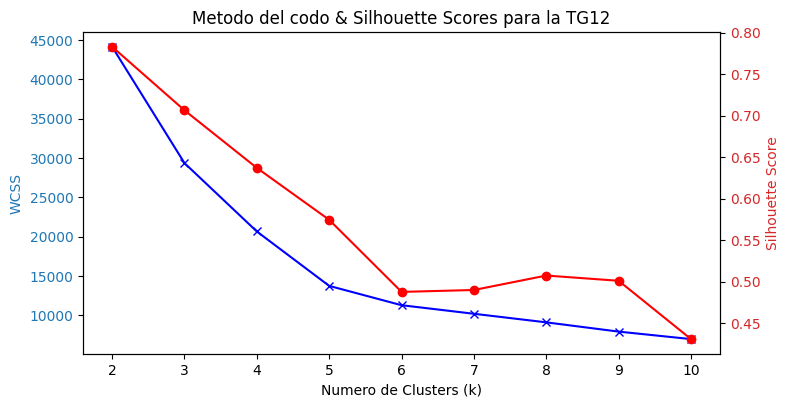

In [177]:
# Plotting the elbow method and silhouette scores
fig, ax1 = plt.subplots(figsize=(8, 4))

ax1.set_xlabel('Numero de Clusters (k)')
ax1.set_ylabel('WCSS', color='tab:blue')
ax1.plot(K, wcss, 'bx-')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Silhouette Score', color='tab:red')
ax2.plot(K, silhouette_scores, 'ro-')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.tight_layout()
plt.title('Metodo del codo & Silhouette Scores para la TG12')
plt.show()

In [178]:
df_summary_TG12 = pd.DataFrame({
    'Number of Clusters (k)': K,
    'WCSS': wcss,
    'Silhouette Score': silhouette_scores
})
df_summary_TG12

Number of Clusters (k)          WCSS  Silhouette Score
0                       2  44137.623908          0.782900
1                       3  29360.511063          0.706382
2                       4  20672.428045          0.637020
3                       5  13760.283665          0.574511
4                       6  11306.138076          0.487760
5                       7  10218.956383          0.490044
6                       8   9129.342690          0.507447
7                       9   7952.717366          0.501131
8                      10   7001.912138          0.430931

*Observamos que tenemos un SS similar para el un cluster 4 o 5. Intentaremos probar con el cluster 04 y ver si existe una correlación*

In [179]:
#@title Cluster 3 para TG11
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters_TG12 = kmeans.fit_predict(X_processed_TG12)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [180]:
df_TG12['Cluster_TG12'] = clusters_TG12
df_TG12

G2_DWATT    G2_CTIM      G2_CTD      G2_CPD  G2_AT_prom     G2_FQG  \
0      182.815323  50.662487  709.082214  216.787766   70.520775  27.598213   
1      178.347397  50.407425  701.566467  212.064224   70.243543  27.109358   
2      184.782959  50.722748  712.161804  219.172928   70.274457  27.900240   
3      184.081924  50.741253  709.464478  216.568054   70.235840  27.725624   
4      184.731506  50.684986  711.226379  218.603180   70.121435  27.959797   
...           ...        ...         ...         ...         ...        ...   
15452  182.363754  50.907078  709.253052  216.577118   69.352938  22.084225   
15453  183.701843  50.810791  709.982178  217.316299   69.881037  22.229137   
15454  182.346649  50.615261  710.879944  217.131378   69.852707  22.093319   
15455  184.555573  50.781822  712.816101  218.448425   69.739680  22.426748   
15456  182.695419  51.083359  711.557251  216.592102   69.640251  22.112003   

       G2_CSBHX  G2_efic_comp  Cluster_TG12  
0      0.595173      0.934881             0  
1      0.623664      0.935165             0  
2      0.596470      0.936175             0  
3      0.619411      0.936363             0  
4      0.639907      0.936192             0  
...         ...           ...           ...  
15452  0.390849      0.937190             0  
15453  0.388250      0.937008             0  
15454  0.388828      0.933968             0  
15455  0.380141      0.936677             0  
15456  0.381029      0.935127             0  

[14553 rows x 9 columns]

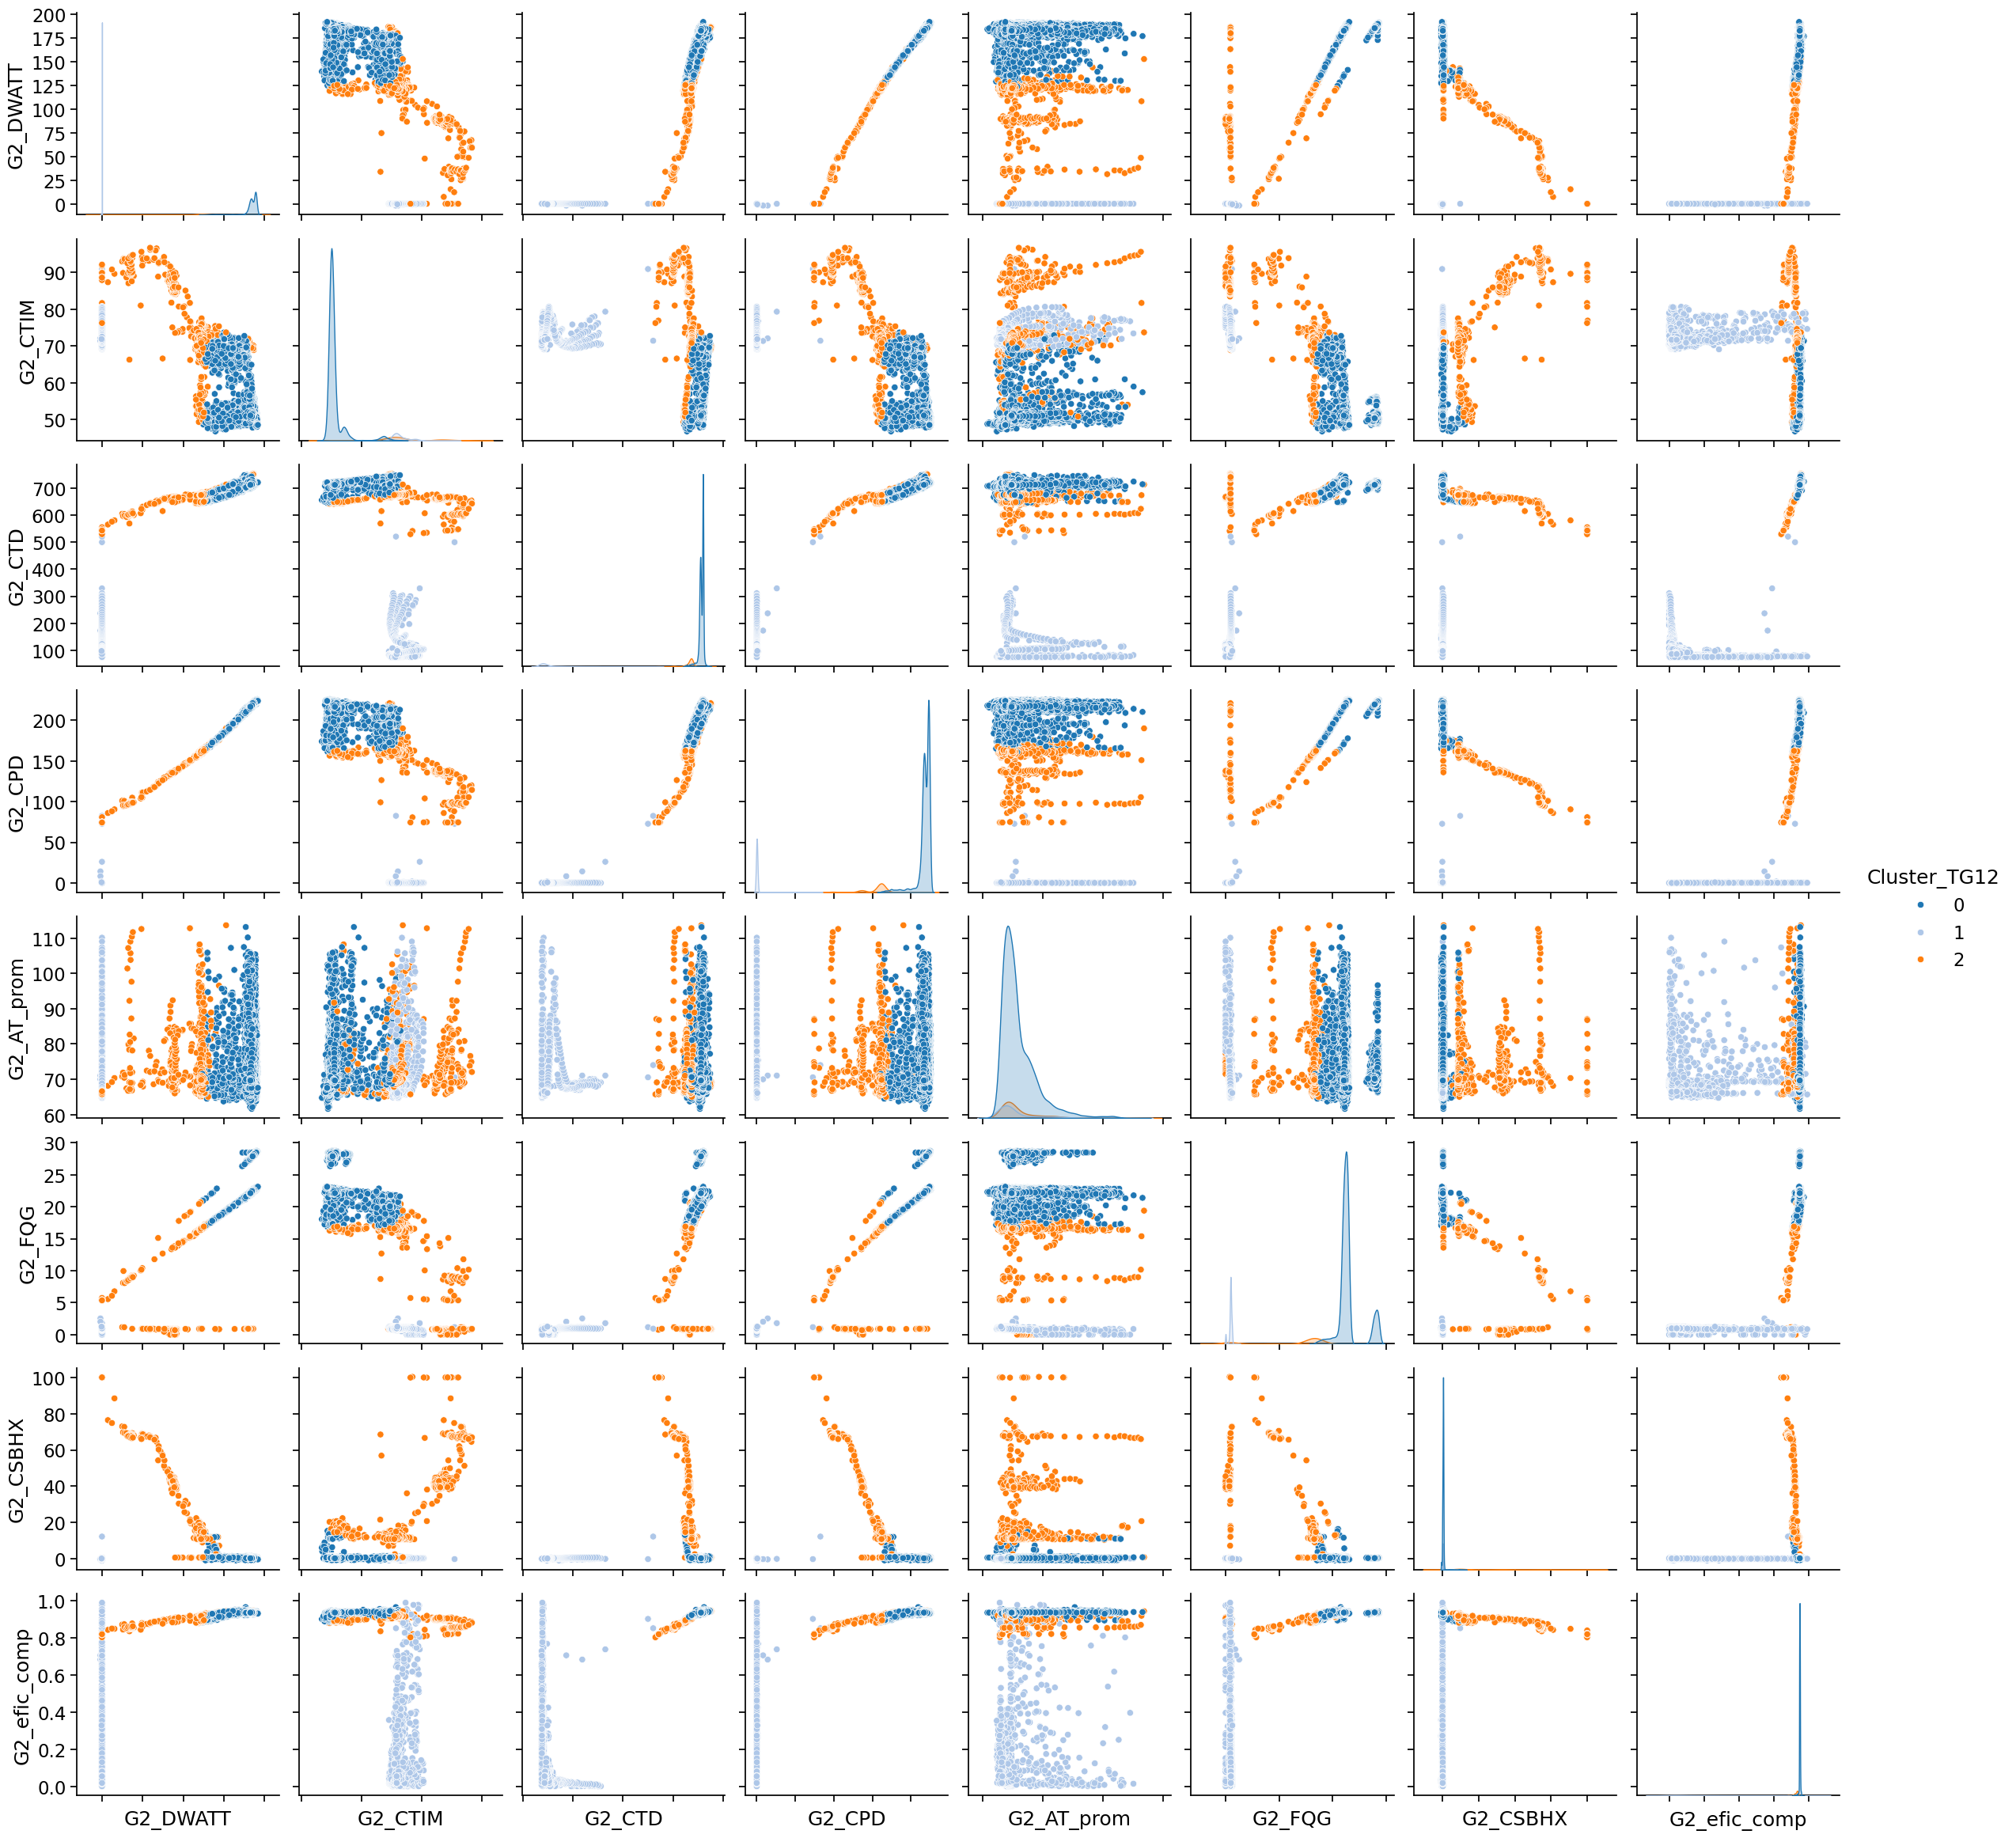

In [181]:
with sns.plotting_context("notebook", font_scale=1.5):
    g = sns.pairplot(df_TG12,
                     hue='Cluster_TG12', palette='tab20', height=3)
    g.set(xticklabels=[])

plt.show()

Si bien identificamos que la eficiencia del compresor de la TG12 es mayor al compresor de la TG11, trataremos a agrupar en grupo de 5 intervalos para abarcar los datos.

Eficiencia Compresor TG11:
- Eficiencia A: Alta Eficiencia [0.94 a 1.00]
- Eficiencia B: Carga Base [0.925 a 0.94]
- Eficiencia C: Minimo Tec [0.88 a 0.925]
- Eficiencia D: Baja Eficiencia [0a 0.88]





In [182]:
labels = [0,          #'Eficiencia D: Fuera de Servicio & baja eficiencia'
          1,          #'Eficiencia C: Baja Eficiencia'
          2,          #'Eficiencia B: Minimo Tec'
          3]          #'Eficiencia A: Carga Base'

In [183]:
#@title Definir Rango de Eficiencia TG12
bins_TG12 = [0, 0.87, 0.925, 0.94, 1.00]
df_TG12['Eficiencia_Clasificacion'] = pd.cut(df_TG12['G2_efic_comp'], bins=bins_TG12, labels=labels, right=False)

In [184]:
df_visual_TG12 = df_TG12[['G2_DWATT','G2_AT_prom','G2_CSBHX','Cluster_TG12','Eficiencia_Clasificacion']]
df_visual_TG12['Eficiencia_Clasificacion'] = df_visual_TG12['Eficiencia_Clasificacion'].astype(int)
df_visual_TG12

<ipython-input-184-9be89922f92a>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



G2_DWATT  G2_AT_prom  G2_CSBHX  Cluster_TG12  \
0      182.815323   70.520775  0.595173             0   
1      178.347397   70.243543  0.623664             0   
2      184.782959   70.274457  0.596470             0   
3      184.081924   70.235840  0.619411             0   
4      184.731506   70.121435  0.639907             0   
...           ...         ...       ...           ...   
15452  182.363754   69.352938  0.390849             0   
15453  183.701843   69.881037  0.388250             0   
15454  182.346649   69.852707  0.388828             0   
15455  184.555573   69.739680  0.380141             0   
15456  182.695419   69.640251  0.381029             0   

       Eficiencia_Clasificacion  
0                             2  
1                             2  
2                             2  
3                             2  
4                             2  
...                         ...  
15452                         2  
15453                         2  
15454                         2  
15455                         2  
15456                         2  

[14553 rows x 5 columns]

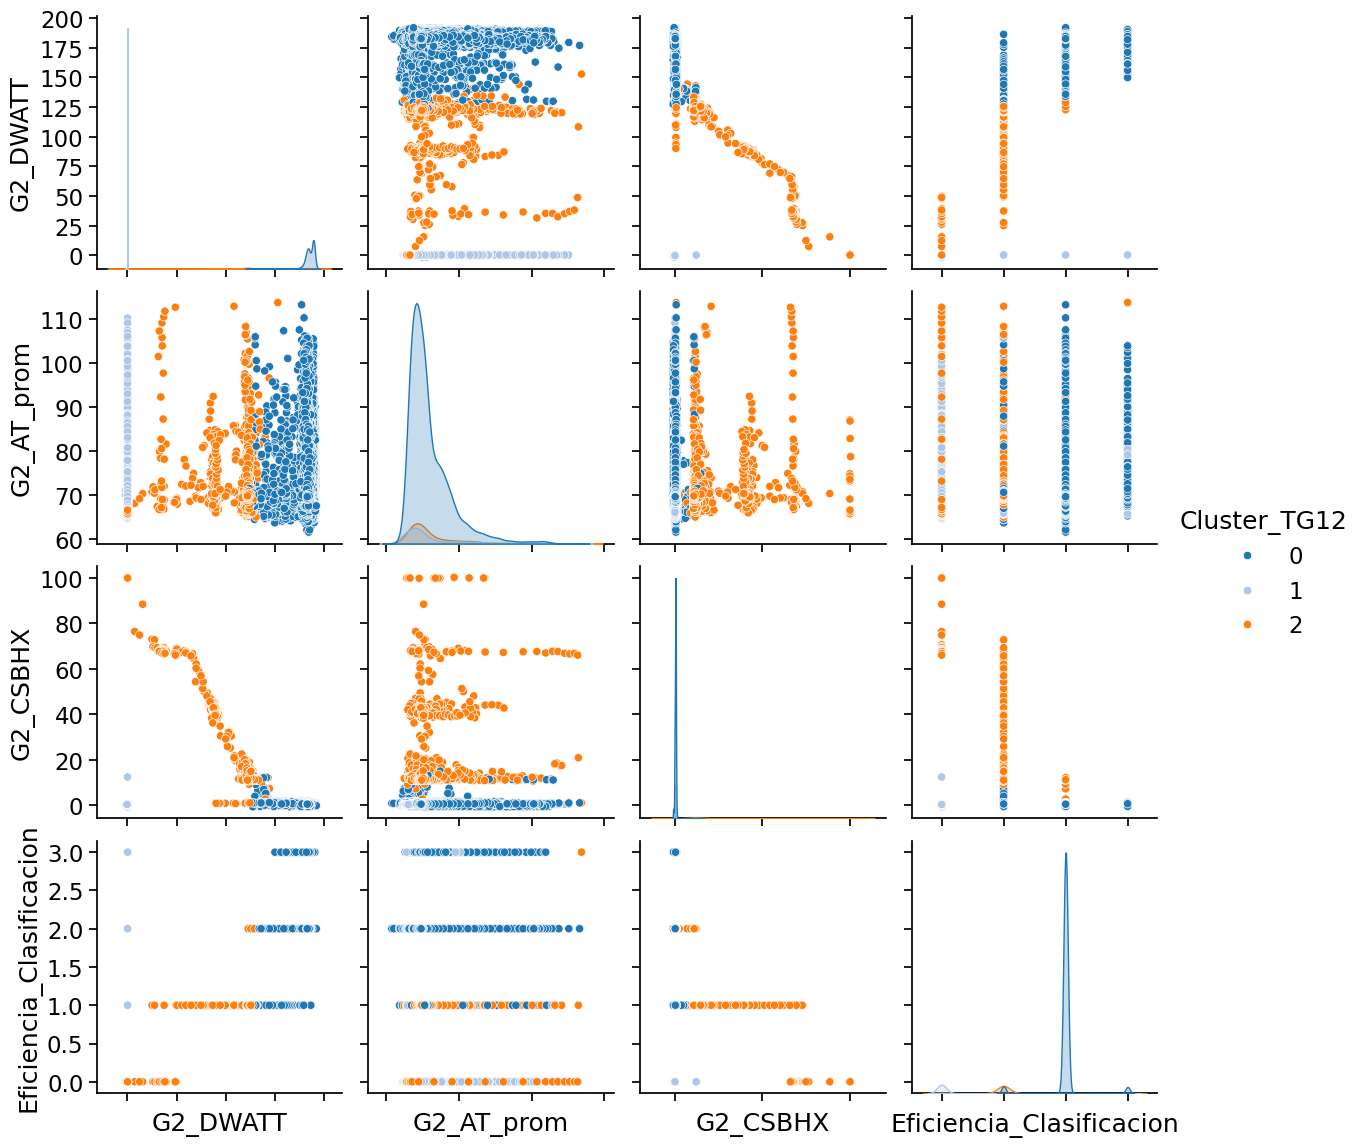

In [185]:
with sns.plotting_context("notebook", font_scale=1.5):
    g = sns.pairplot(df_visual_TG12,
                     hue='Cluster_TG12', palette='tab20', height=3)
    g.set(xticklabels=[])

plt.show()

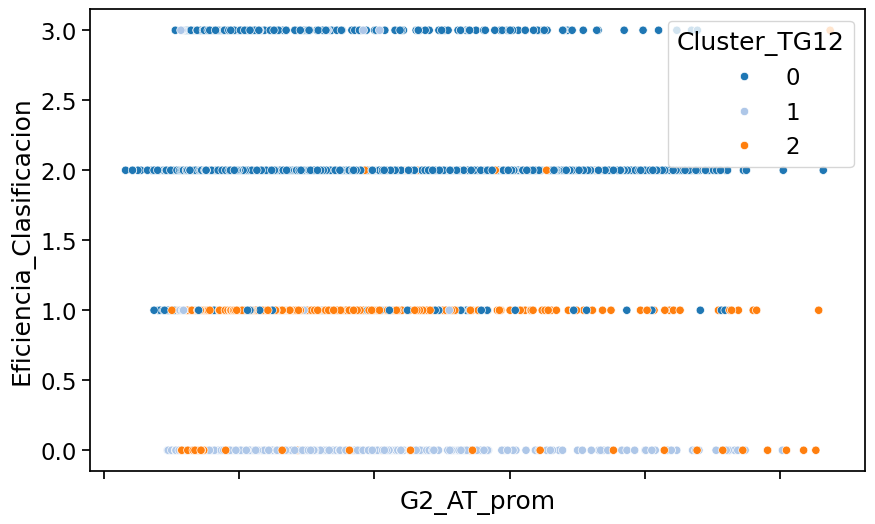

In [186]:
with sns.plotting_context("notebook", font_scale=1.5):
    plt.figure(figsize=(10, 6))
    g = sns.scatterplot(data=df_visual_TG12, x='G2_AT_prom', y='Eficiencia_Clasificacion', hue='Cluster_TG12', palette='tab20')
    g.set(xticklabels=[])

plt.show()

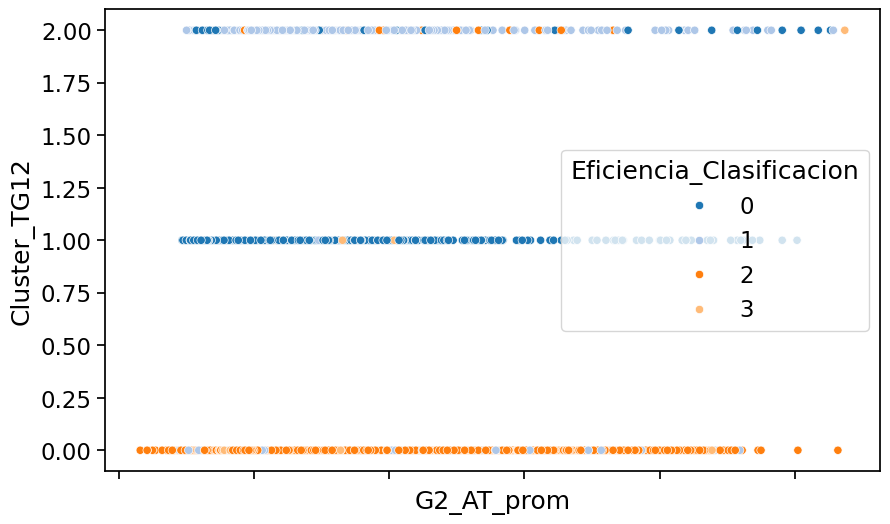

In [187]:
with sns.plotting_context("notebook", font_scale=1.5):
    plt.figure(figsize=(10, 6))
    g = sns.scatterplot(data=df_visual_TG12, x='G2_AT_prom', y='Cluster_TG12', hue='Eficiencia_Clasificacion', palette='tab20')
    g.set(xticklabels=[])

plt.show()

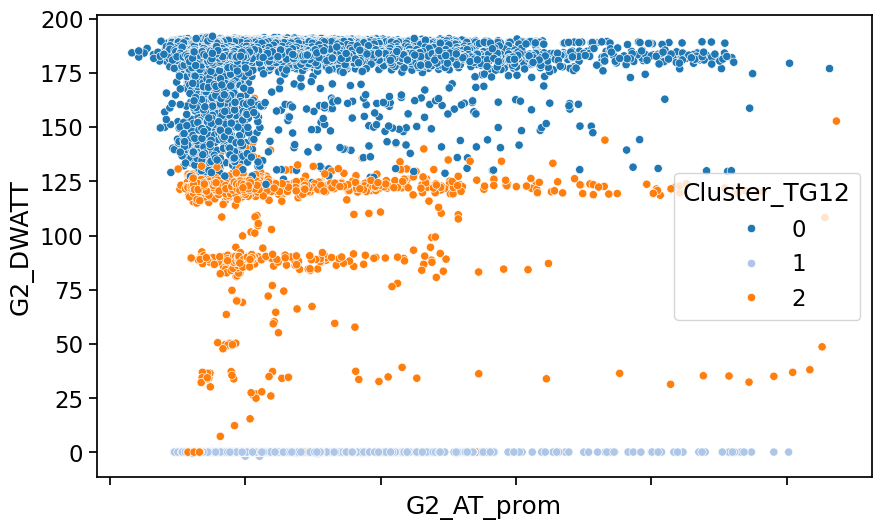

In [188]:
with sns.plotting_context("notebook", font_scale=1.5):
    plt.figure(figsize=(10, 6))
    g = sns.scatterplot(data=df_visual_TG12, x='G2_AT_prom', y='G2_DWATT', hue='Cluster_TG12', palette='tab20')
    g.set(xticklabels=[])

plt.show()